## loading the system

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ddareung/submission.csv
/kaggle/input/ddareung/train.csv
/kaggle/input/ddareung/test.csv


## loading the library

In [2]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## loading and validation the data

In [3]:
train = pd.read_csv('../input/ddareung/train.csv') 
test = pd.read_csv('../input/ddareung/test.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      715 non-null    int64  
 1   hour                    715 non-null    int64  
 2   hour_bef_temperature    714 non-null    float64
 3   hour_bef_precipitation  714 non-null    float64
 4   hour_bef_windspeed      714 non-null    float64
 5   hour_bef_humidity       714 non-null    float64
 6   hour_bef_visibility     714 non-null    float64
 7   hour_bef_ozone          680 non-null    float64
 8   hour_bef_pm10           678 non-null    float64
 9   hour_bef_pm2.5          679 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 56.0 KB


In [6]:
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [7]:
test.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0


In [8]:
train.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1457.000000,1457.000000,1450.000000,1457.000000,1457.000000,1383.000000,1369.000000,1342.000000,1459.000000
mean,1105.914325,11.493489,16.717433,0.031572,2.479034,52.231297,1405.216884,0.039149,57.168736,30.327124,108.563400
std,631.338681,6.922790,5.239150,0.174917,1.378265,20.370387,583.131708,0.019509,31.771019,14.713252,82.631733
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,879.000000,0.025500,36.000000,20.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.039000,51.000000,26.000000,96.000000
75%,1651.000000,17.500000,20.100000,0.000000,3.400000,69.000000,1994.000000,0.052000,69.000000,37.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


In [9]:
test.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
count,715.000000,715.000000,714.000000,714.000000,714.000000,714.000000,714.000000,680.000000,678.000000,679.000000
mean,1056.854545,11.472727,23.263305,0.051821,2.388515,56.668067,1359.494398,0.041196,36.930678,24.939617
std,625.574471,6.928427,4.039645,0.221820,1.171270,19.661880,614.171870,0.020656,12.641503,10.075857
min,0.000000,0.000000,14.600000,0.000000,0.000000,16.000000,126.000000,0.003000,9.000000,7.000000
25%,507.000000,5.500000,20.300000,0.000000,1.500000,42.000000,807.250000,0.027000,28.000000,17.000000
50%,1046.000000,11.000000,22.900000,0.000000,2.300000,55.000000,1489.000000,0.039000,35.000000,24.000000
75%,1616.500000,17.000000,26.375000,0.000000,3.275000,73.750000,2000.000000,0.052250,45.000000,31.000000
max,2177.000000,23.000000,33.800000,1.000000,5.900000,100.000000,2000.000000,0.138000,94.000000,69.000000


In [10]:
train.corr(method="spearman", min_periods=1)

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
id,1.000000,-0.010895,-0.001181,-0.056236,0.004794,-0.020864,0.012936,0.056406,-0.026675,0.005269,0.004506
hour,-0.010895,1.000000,0.412688,0.021642,0.492244,-0.338976,0.175408,0.405257,-0.022840,-0.059497,0.677338
hour_bef_temperature,-0.001181,0.412688,1.000000,-0.107538,0.384262,-0.489407,0.173846,0.509488,-0.030947,-0.011672,0.629970
hour_bef_precipitation,-0.056236,0.021642,-0.107538,1.000000,0.017396,0.244645,-0.192510,-0.059152,-0.057285,0.028307,-0.194600
hour_bef_windspeed,0.004794,0.492244,0.384262,0.017396,1.000000,-0.450708,0.249810,0.557951,-0.029513,-0.215049,0.492857
hour_bef_humidity,-0.020864,-0.338976,-0.489407,0.244645,-0.450708,1.000000,-0.554451,-0.448808,-0.046608,0.224357,-0.495135
hour_bef_visibility,0.012936,0.175408,0.173846,-0.192510,0.249810,-0.554451,1.000000,0.122836,-0.522721,-0.689496,0.295090
hour_bef_ozone,0.056406,0.405257,0.509488,-0.059152,0.557951,-0.448808,0.122836,1.000000,0.112640,0.000282,0.451448
hour_bef_pm10,-0.026675,-0.022840,-0.030947,-0.057285,-0.029513,-0.046608,-0.522721,0.112640,1.000000,0.658057,-0.087734
hour_bef_pm2.5,0.005269,-0.059497,-0.011672,0.028307,-0.215049,0.224357,-0.689496,0.000282,0.658057,1.000000,-0.123039


<AxesSubplot:title={'center':'The correlation of the number of lental bicycle'}>

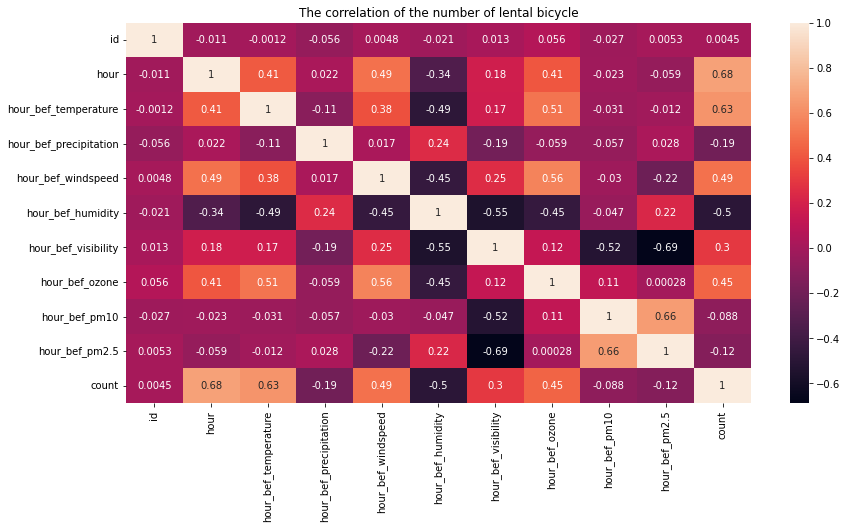

In [11]:
# Correlation between count and other columns
corr = train.corr(method="spearman", min_periods=1)

# Set the width and height of the figure
plt.figure(figsize=(14, 7))

# Add title
plt.title("The correlation of the number of lental bicycle")

# Heatmap showing correlation between count and other columns
sns.heatmap(data=corr, annot=True)


In [12]:
# Chooce features with correlation is positive
ddareung_features = ['hour', 'hour_bef_temperature', 'hour_bef_windspeed', 'hour_bef_visibility', 'hour_bef_ozone']

In [13]:
# to do list
# normalize

## Validation and processing of null

In [14]:
train.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [15]:
test.isnull().sum()

id                         0
hour                       0
hour_bef_temperature       1
hour_bef_precipitation     1
hour_bef_windspeed         1
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64

In [16]:
train.fillna(0,inplace = True)
test.fillna(0,inplace = True)

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1459 non-null   float64
 3   hour_bef_precipitation  1459 non-null   float64
 4   hour_bef_windspeed      1459 non-null   float64
 5   hour_bef_humidity       1459 non-null   float64
 6   hour_bef_visibility     1459 non-null   float64
 7   hour_bef_ozone          1459 non-null   float64
 8   hour_bef_pm10           1459 non-null   float64
 9   hour_bef_pm2.5          1459 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [18]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      715 non-null    int64  
 1   hour                    715 non-null    int64  
 2   hour_bef_temperature    715 non-null    float64
 3   hour_bef_precipitation  715 non-null    float64
 4   hour_bef_windspeed      715 non-null    float64
 5   hour_bef_humidity       715 non-null    float64
 6   hour_bef_visibility     715 non-null    float64
 7   hour_bef_ozone          715 non-null    float64
 8   hour_bef_pm10           715 non-null    float64
 9   hour_bef_pm2.5          715 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 56.0 KB


## Define and fit model

In [19]:
train_x = train.drop(['count'],axis = 1)
train_y = train['count']

In [20]:
model=RandomForestRegressor(n_estimators=100)
model.fit(train_x,train_y)

RandomForestRegressor()

## Generate the data with trained the model 

In [21]:
pred = model.predict(test)

## Create submission file

In [22]:
# submission = pd.read_csv('/content/data/submission.csv')
# submission

In [23]:
# submission['count'] = pred

In [24]:
# submission

In [25]:
# submission.to_csv('베이스라인.csv',index = False)